In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from flask import Flask, jsonify

In [13]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector=inspect(engine)

In [16]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [17]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
measurement= base.classes.measurement
station= base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prv_yr = dt.date(2017,8,23)- dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prv_yr).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp = pd.DataFrame(results, columns = ["date", "prcp"])
# Sort the dataframe by date
prcp= prcp.set_index("date")
prcp

prcp
date            
2016-08-23  0.00
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00
...          ...
2017-08-19  0.09
2017-08-20   NaN
2017-08-21  0.56
2017-08-22  0.50
2017-08-23  0.45

[2230 rows x 1 columns]

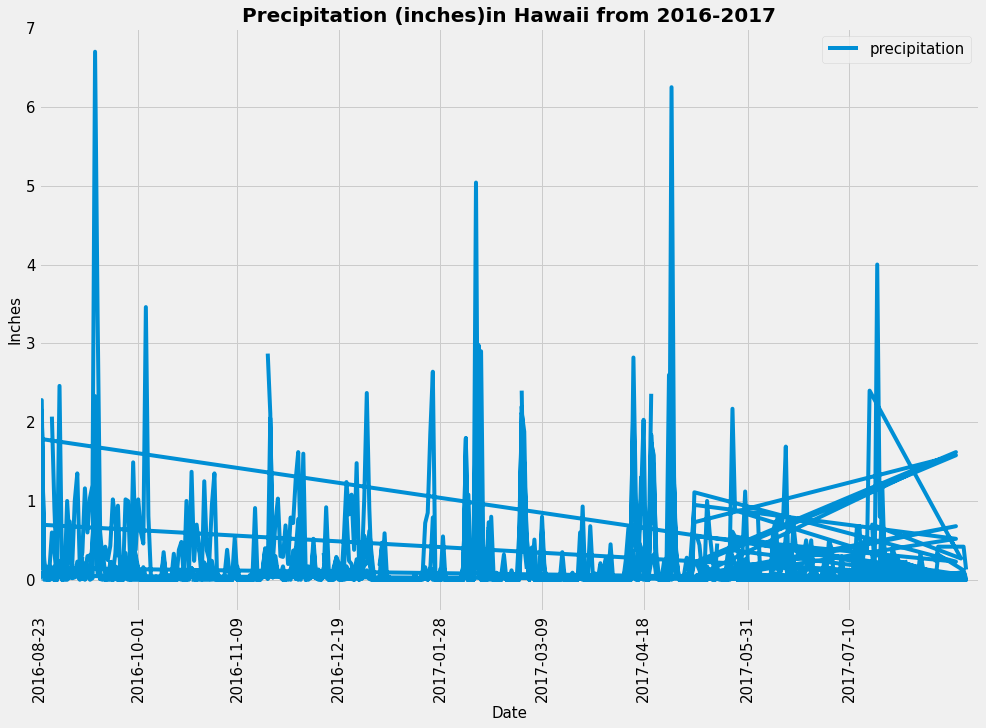

In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Set plot and plot the chart
plt.figure(figsize=(15, 10))
plt.plot(prcp.index, prcp['prcp'])

# Add legned 
plt.legend(['precipitation'], loc="upper right",fontsize=15)
# set x location
xloc = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18','2017-05-31','2017-07-10'] 

# Assign xticks
plt.xticks(xloc, rotation='vertical',fontsize=15)
# Set Labels & Title
plt.xlabel('Date', fontsize=15)
plt.ylabel("Inches",fontsize=15)
plt.title("Precipitation (inches)in Hawaii from 2016-2017",fontsize=20, fontweight = 'bold')
plt.yticks(size=15)

# Asign xlim and ylim
plt.xlim(0,370)
plt.ylim(-0.4,7)


# Save Figure
plt.savefig("Figures/prcp.png")
# Show plot
plt.show()

# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number stations in the dataset
columns = inspector.get_columns('station')
session.query(station.id).count()

9

In [38]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.id)).\
group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_temp = session.query(measurement.station, measurement.tobs)\
    .filter(measurement.date >= '2016-08-23')\
    .filter(measurement.station == 'USC00519281')\
    .all()
max_temp = pd.DataFrame(max_temp)
max_temp.head()

0     1
0  USC00519281  77.0
1  USC00519281  77.0
2  USC00519281  80.0
3  USC00519281  80.0
4  USC00519281  75.0

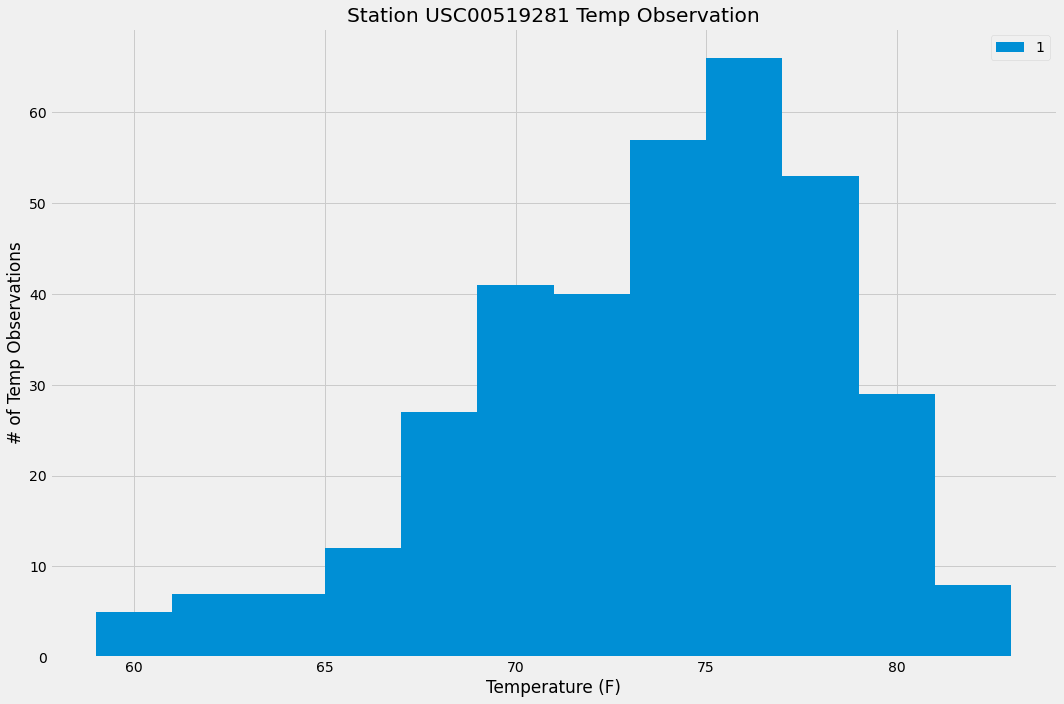

In [46]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_temp.plot.hist(figsize=(15, 10),bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("# of Temp Observations")
plt.title("Station USC00519281 Temp Observation")
plt.tight_layout()
plt.savefig("Figures/histogram.png")
plt.show()

# Close session

In [47]:
# Close Session
session.close()